<a href="https://colab.research.google.com/github/JV-Machado/NBA_team_clustering/blob/master/NBA_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1637]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1638]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Montando o Dataset

In [1639]:
soup_url = requests.get("https://www.basketball-reference.com/leagues/NBA_2023.html#all_per_game_team-opponent")
soup = BeautifulSoup(soup_url.content)

In [1640]:
#table = soup.find("table", attrs={"id" : "per_game_stats"})
table_team = soup.find(lambda tag: tag.name=="table" and tag.has_attr('id') and tag['id']=="per_poss-team")
table_opponent = soup.find(lambda tag: tag.name=="table" and tag.has_attr('id') and tag['id']=="per_poss-opponent")

In [1641]:
th = table_team.find("thead").find("tr").find_all("th")

In [1642]:
header = []
for t in th:
  header.append(t.getText())

In [1643]:
header = header[1:]
header

['Team',
 'G',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [1644]:
data_team = table_team.find('tbody').find_all('tr')
data_opponent = table_opponent.find('tbody').find_all('tr')

In [1645]:
nba_teams = []
for team in data_team:
  stats = [td.getText() for td in team.find_all('td')]
  nba_teams.append(stats)

In [1646]:
nba_opponents = []
for opponent in data_opponent:
  stats = [td.getText() for td in opponent.find_all('td')]
  nba_opponents.append(stats)

In [1647]:
df_team = pd.DataFrame(columns=header, data=nba_teams)
df_opponents = pd.DataFrame(columns=header, data=nba_opponents)

In [1648]:
team_pts = df_team[['Team', 'PTS']].rename(columns={'PTS': 'Points Scored'})
opponent_pts = df_opponents[['Team', 'PTS']].rename(columns={'PTS': 'Points Conceded'})

In [1649]:
df = pd.merge(team_pts, opponent_pts).sort_values('Team')
df

,Team,Points Scored,Points Conceded
6,Atlanta Hawks*,116.6,116.3
1,Boston Celtics*,118.0,111.5
16,Brooklyn Nets*,115.0,114.1
29,Charlotte Hornets,109.2,115.3
23,Chicago Bulls*,113.5,112.2
7,Cleveland Cavaliers*,116.1,110.6
5,Dallas Mavericks,116.8,116.7
4,Denver Nuggets*,117.6,114.2
27,Detroit Pistons,110.7,118.9
8,Golden State Warriors*,116.1,114.4


In [1650]:
columns_to_convert = ['Points Scored', 'Points Conceded']

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric)

In [1651]:
mean = df['Points Scored'].mean().round(1)
df['Points Scored Diff'] = df['Points Scored'].map(lambda x: x - mean)
df['Points Conceded Diff'] = df['Points Conceded'].map(lambda x: mean - x)

In [1652]:
df = df.set_index('Team')
df

,Points Scored,Points Conceded,Points Scored Diff,Points Conceded Diff
Team,,,,
Atlanta Hawks*,116.6,116.3,1.8,-1.5
Boston Celtics*,118.0,111.5,3.2,3.3
Brooklyn Nets*,115.0,114.1,0.2,0.7
Charlotte Hornets,109.2,115.3,-5.6,-0.5
Chicago Bulls*,113.5,112.2,-1.3,2.6
Cleveland Cavaliers*,116.1,110.6,1.3,4.2
Dallas Mavericks,116.8,116.7,2.0,-1.9
Denver Nuggets*,117.6,114.2,2.8,0.6
Detroit Pistons,110.7,118.9,-4.1,-4.1


# Normalização e treinamento

In [1653]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [1654]:
columns_to_normalize = ['Points Scored', 'Points Conceded', 'Points Scored Diff', 'Points Conceded Diff']

In [1655]:
mms = MinMaxScaler()
df_normalized = mms.fit_transform(df[columns_to_normalize])

In [1656]:
for i, col in enumerate(columns_to_normalize):
  df[col] = df_normalized[:, i]

In [1657]:
df = df.drop(columns=['Points Scored', 'Points Conceded'])

In [1658]:
ap = AffinityPropagation(damping=0.7).fit(df)

In [1659]:
labels = ap.labels_
labels

array([5, 2, 0, 4, 2, 2, 5, 3, 1, 0, 1, 5, 0, 0, 2, 4, 2, 0, 2, 3, 0, 4,
       3, 0, 5, 3, 1, 0, 5, 0])

In [1660]:
df['cluster'] = labels
df

,Points Scored Diff,Points Conceded Diff,cluster
Team,,,
Atlanta Hawks*,0.725490,0.393617,5
Boston Celtics*,0.862745,0.904255,2
Brooklyn Nets*,0.568627,0.627660,0
Charlotte Hornets,0.000000,0.500000,4
Chicago Bulls*,0.421569,0.829787,2
Cleveland Cavaliers*,0.676471,1.000000,2
Dallas Mavericks,0.745098,0.351064,5
Denver Nuggets*,0.823529,0.617021,3
Detroit Pistons,0.147059,0.117021,1


In [1661]:
for i in range(df['cluster'].nunique()):
  print(df.loc[df['cluster'] == i])
  print()
  print()
  print()

                         Points Scored Diff  Points Conceded Diff  cluster
Team                                                                      
Brooklyn Nets*                     0.568627              0.627660        0
Golden State Warriors*             0.676471              0.595745        0
Los Angeles Clippers*              0.568627              0.585106        0
Los Angeles Lakers*                0.519608              0.648936        0
Minnesota Timberwolves*            0.441176              0.659574        0
Oklahoma City Thunder*             0.588235              0.617021        0
Phoenix Suns*                      0.578431              0.744681        0
Toronto Raptors*                   0.617647              0.638298        0
Washington Wizards                 0.509804              0.468085        0



                   Points Scored Diff  Points Conceded Diff  cluster
Team                                                                
Detroit Pistons              0.147

<Axes: xlabel='Points Scored Diff', ylabel='Points Conceded Diff'>

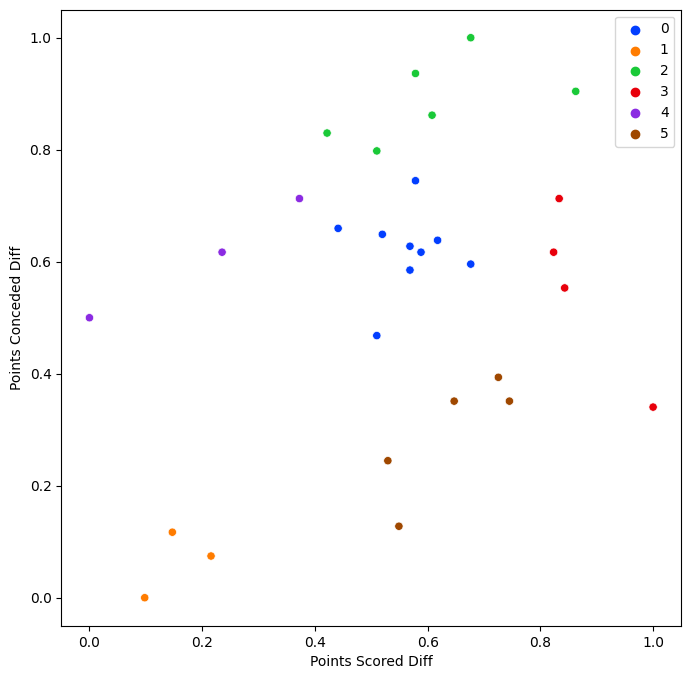

In [1670]:
plt.figure(figsize=(8,8))

sns.scatterplot(x=df['Points Scored Diff'], y=df['Points Conceded Diff'], hue=labels, palette='bright')